<a href="https://colab.research.google.com/github/BIDS-CPU/Data-Analyst-Excercises/blob/main/Taiyo_Web_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import matplotlib.pyplot as plt


def webscraping():
  baseurl='https://opentender.eu/'
  page=requests.get(baseurl)
  if page.status_code!=200:
    raise Exception('Failed to load page {}'.format(page))
  soup=BeautifulSoup(page.content,'html.parser')


  links=soup.find_all('a')
  country_link=[]
  country_name=[]
  for i in links[6:39]:
    country_link.append(baseurl+i.get('href'))
    country_name.append(i.text)

    count_of_tenders= soup.find_all('div')[21:54]
    tenders = []

    for i in count_of_tenders:
        tenders.append(i.text)
    
    reg = re.compile(r'\d+.?\d+')
    total_tenders = []

    for i in tenders:
        if 'Million' in i:
            mo = reg.findall(i)
            number = float(mo[0]) * 1000000
            total_tenders.append(number)
        else:
            total_tenders.append(i)
        
  df=pd.DataFrame({'Country':country_name,'Number of tenders':total_tenders,'links':country_link,})
  df.to_csv('scrapper.csv', index= False)


In [124]:
a=webscraping()
a

In [125]:
df1=pd.read_csv('scrapper.csv')

In [126]:
df1.dtypes

Country              object
Number of tenders    object
links                object
dtype: object

In [130]:
df1['Number of tenders']=df1['Number of tenders'].str.replace(',','')

In [132]:
df1['Number of tenders']=df1['Number of tenders'].astype(float)

In [133]:
df1

,Country,Number of tenders,links
0,Austria,135205.0,https://opentender.eu//at?lang=en
1,Belgium,106847.0,https://opentender.eu//be?lang=en
2,Bulgaria,198439.0,https://opentender.eu//bg?lang=en
3,Croatia,236320.0,https://opentender.eu//hr?lang=en
4,Cyprus,9925.0,https://opentender.eu//cy?lang=en
5,Czech Republic,283032.0,https://opentender.eu//cz?lang=en
6,Denmark,52290.0,https://opentender.eu//dk?lang=en
7,Estonia,119964.0,https://opentender.eu//ee?lang=en
8,EU Institutions,189075.0,https://opentender.eu//eu?lang=en
9,Finland,69002.0,https://opentender.eu//fi?lang=en


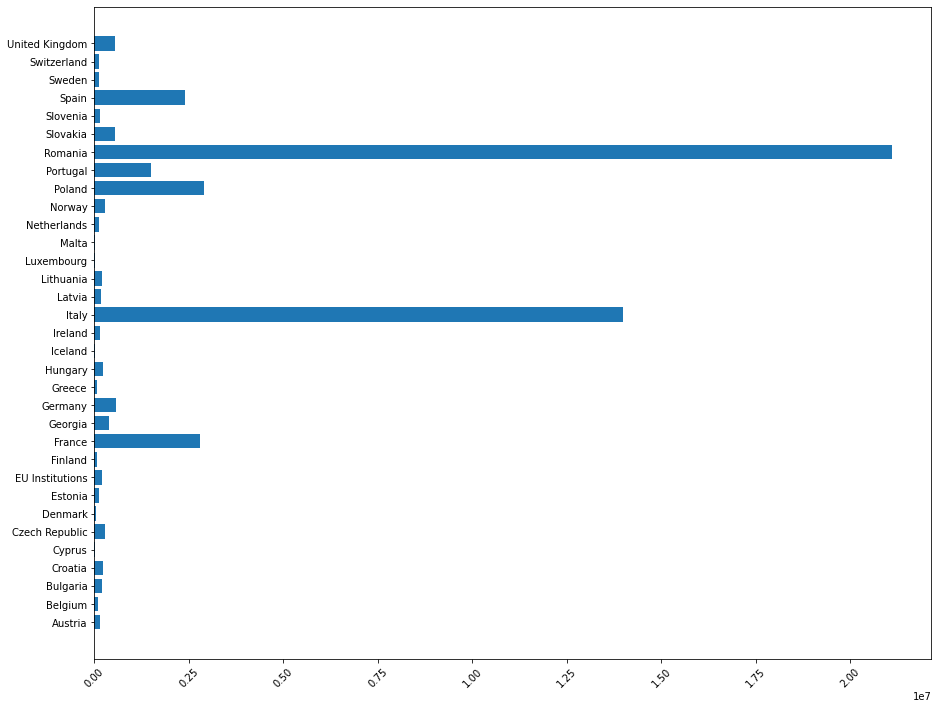

In [170]:
plt.figure(figsize=(15,12))
plt.barh(df1['Country'],df1['Number of tenders'])
plt.xticks(rotation=45)
plt.show()

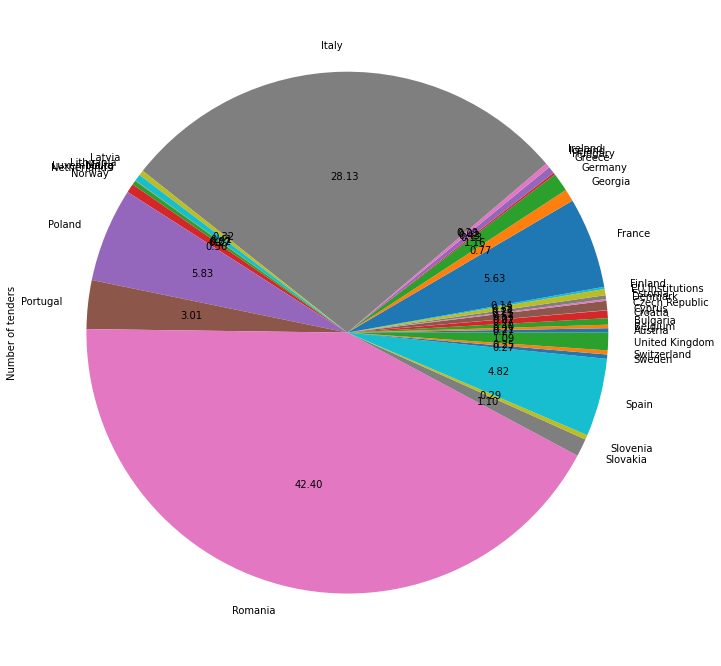

In [180]:
df1['Number of tenders'].plot(kind='pie',labels=df1['Country'],figsize=(20,12),autopct="%1.2f")